In [52]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from gurobipy import *
from random import sample
import numpy as np
import random

plt.rcParams['figure.figsize'] = [10, 10] ## set the size of all figures

# Question 6.a

In [53]:
G=nx.read_weighted_edgelist("WV.txt")

for (i,j,d) in G.edges(data=True):
    print(i,j,d['weight'])

155392497 155347563 54484.0
155347563 155356150 26945.0
155347563 154841150 29265.0
155356150 2551970749 16629.0
155356150 2687232852 61.0
154841150 4591252183 292.0
154841150 4591252414 47.0
154766929 154766950 966.0
154766929 946822032 9164.0
154766950 154763442 11669.0
154763442 154763456 366.0
154763442 154763472 825.0
154833326 946821908 9126.0
154833326 154764571 1030.0
946821908 946821532 975.0
946821908 155873362 467.0
946821532 155873362 525.0
946821532 946821055 1166.0
155873362 155873346 175.0
155873362 9611789845 412.0
155229680 3411750149 49.0
155229680 155397660 1264.0
155229680 946397334 358.0
155229680 3411750163 236.0
155229680 8681173829 70.0
3411750149 3411750156 51.0
3411750149 8680019607 37.0
155397660 155319470 211.0
155397660 8680019589 115.0
155397660 1358764547 306.0
3411750156 3431031765 25.0
3411750156 8680019607 29.0
8680019607 8680019589 1245.0
8680019607 946397312 333.0
8680019607 3352369633 742.0
155319470 155389092 195.0
155319470 8678068768 419.0
155319

156210656 156210654 46.0
156210656 156218328 44.0
156210654 2690726051 39630.0
156210654 156218328 39.0
156218328 155641253 47055.0
154878611 7259374640 5556.0
7259374640 155305197 29538.0
7259374640 2773383026 16792.0
155305197 154926561 17961.0
155305197 155293141 9795.0
154926561 3500161720 14444.0
3500161720 154927429 23.0
3500161720 3500161712 39.0
155293141 155300775 116.0
155293141 155280480 372.0
155293141 155286893 196.0
154927429 3500161718 23.0
154927429 3500161712 33.0
3500161718 3500161712 44.0
3500161718 7907156255 782.0
3500161712 705764639 24076.0
7907156255 7907156252 58.0
7907156255 7907156241 60.0
705764639 705764626 279.0
705764639 705764622 119.0
705764639 705764643 310.0
155195711 155210744 1626.0
155210744 2014875914 10215.0
155210744 2013600116 37.0
2014875914 654567639 9.0
2014875914 2014875765 87.0
2014875914 2014875973 162.0
155280480 4024926860 2510.0
155280480 155300775 429.0
4024926860 4024926856 68.0
155300775 155300774 195.0
4024926856 4248953864 4061.0


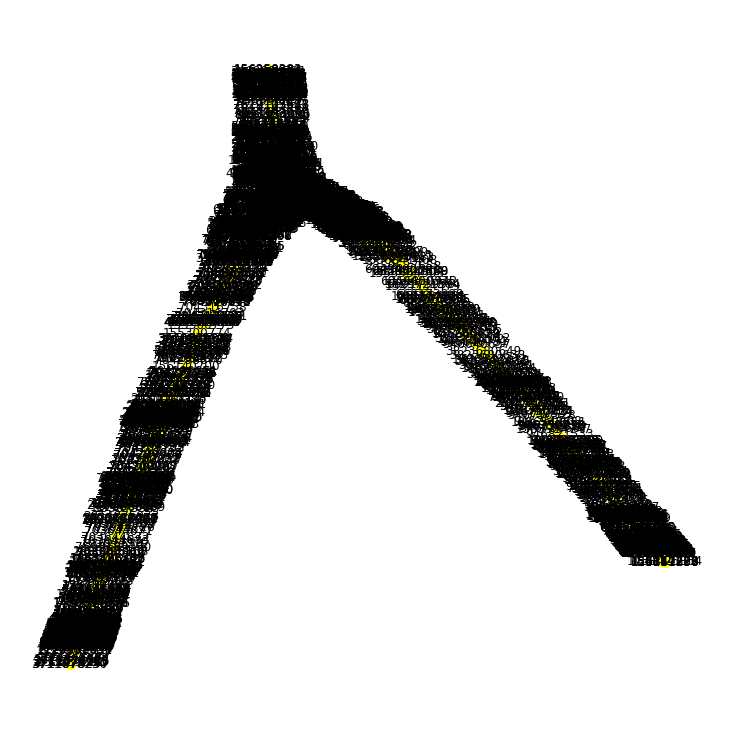

In [54]:
nx.draw_spectral(G, with_labels=True, node_size=100, node_color='yellow')

In [55]:
T=nx.minimum_spanning_tree(G) # getting the minimum cost spanning tree

In [56]:
ered=[(i,j) for (i,j) in T.edges()] # selecting the edges in the tree (so that we can edit them in the plot)

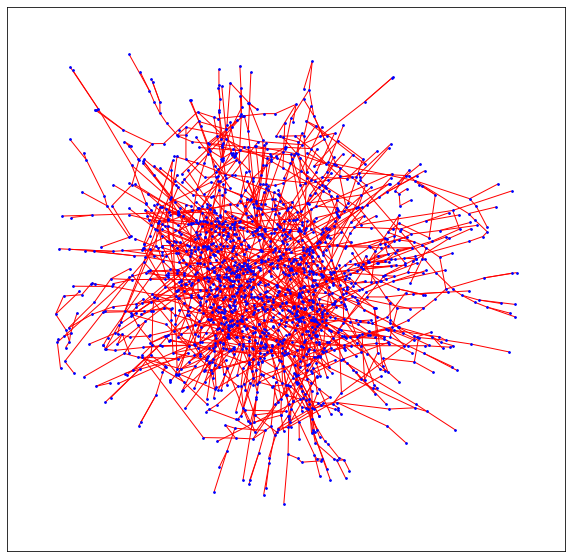

In [57]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=3)
nx.draw_networkx_edges(G,pos,edgelist=ered, edge_color='r', width=1)

In [58]:
shelter=random.sample(list(T.nodes()), k = 1)

In [59]:
totalCost_2=np.sum([nx.shortest_path_length(T, str(i), shelter[0], weight='weight') for i in T.nodes()])
print(totalCost_2)
avgCost_2=totalCost_2/(T.number_of_nodes()-1)
print(avgCost_2)
maxCost_2=np.max([nx.shortest_path_length(T, str(i), shelter[0], weight='weight') for i in T.nodes()])
print(maxCost_2)

227587616.0
120099.00580474934
344241.0


# Question 6.b

In [60]:
shelter2=random.sample(list(T.nodes()), k = 3)
shelter2

['712817505', '154765243', '2687232852']

In [61]:
def shortest_cost_shelter(G, n):
    shortest_cost = 0
    number = 0
    for i in G.nodes():
        if i not in shelter2:
            cost = []
            for j in shelter2:
                local_cost = nx.shortest_path_length(T, str(i), str(j), weight='weight')
                cost.append(local_cost)
            shortest_cost += min(cost)
            number += 1
    return shortest_cost, number, shortest_cost/number

In [62]:
TotalCost_2, unimportant_nodes, AverageCost = shortest_cost_shelter(G, shelter2)

In [63]:
print(TotalCost_2, unimportant_nodes, AverageCost)

223321936.0 1893 117972.49656629689


# Question 6.c

In [64]:
H = G.to_directed()

In [65]:
shelter3=random.sample(list(T.nodes()), k = 1)
shelter3

shelter4=random.sample(list(T.nodes()), k = 1)
shelter4

['7907156232']

In [66]:
shelter3

['2687232852']

In [67]:
def calculate_shortest_path(H, n):
    cost = 0
    number = 0
    terminal=n[0]
    
    for k in H.nodes():
        if k not in terminal:
            model=Model("shortest_path")
            model.Params.LogToConsole = 0
            x={}

            source=k

            for (i,j,d) in H.edges(data=True):
                x[i,j]=model.addVar(vtype=GRB.BINARY, name='x('+str(i)+','+str(j)+')')

            inc={}
            out={}
            for i in H.nodes():
                inc[i]=0 ## define the start value is 0
                out[i]=0 ## define the end value is 0

            for (i,j) in H.edges():
                inc[j]+=x[i,j] ## the output flow of the previous nodes combination is the input flow of the node
                out[i]+=x[i,j] ## the output flow of the node 



            for i in H.nodes(): 
                if i==source:
                    model.addConstr(out[i]-inc[i]==1) ## the source node has a flow equals to 1 (only an input flow)
                elif i==terminal:
                    model.addConstr(out[i]-inc[i]==-1) ## the terminal node has a flow equals to -1 (only an output flow)
                else:
                    model.addConstr(out[i]-inc[i]==0) ## all nodes in the middle will have a balanced flow = 0

            obj = 0
            for (i,j,d) in H.edges(data = True):
                obj +=x[i,j]*d["weight"]

            model.setObjective(obj, GRB.MINIMIZE)

            model.optimize()

            cost += obj.getValue()
            number += 1
    return cost, number, cost/number

In [68]:
TotalCost, nodes, Average_cost =  calculate_shortest_path(H, shelter)
print(TotalCost, nodes, Average_cost)

210394695.0 1895 111026.22427440633


In [69]:
totalCost_2 = np.sum([nx.shortest_path_length(H, str(i), shelter[0], weight='weight') for i in H.nodes()])
print(totalCost_2)
avgCost_2=totalCost_2/(T.number_of_nodes()-1)
print(avgCost_2)
maxCost_2=np.max([nx.shortest_path_length(T, str(i), shelter[0], weight='weight') for i in T.nodes()])
print(maxCost_2)

210394695.0
111026.22427440633
344241.0


In [70]:
np.sum([nx.shortest_path_length(H, str(i), shelter[0], weight='weight') for i in H.nodes()])

210394695.0

In [71]:
shelter

['3704979778']